# Figure 15 (Right panel)

In [1]:
import numpy as np
import astropy.io.ascii as asci
from astropy.table import Table

from matplotlib import gridspec
import matplotlib
import matplotlib.pyplot as plt
fs = 10
matplotlib.rcParams['font.size']=fs
ms = 6
matplotlib.rcParams['lines.markersize']=ms
from matplotlib import gridspec

workdir = '/Users/yuhanyao/Dropbox/Projects/AT2020mrf/'

In [2]:
def add_w20_fbots(ax):
    names = "name,logM,e_logM,E_logM,logSFR,e_logSFR,E_logSFR,logsSFR,e_logsSFR,E_logsSFR,OH_Best,e_OH_Best,E_OH_Best,OH_D16,e_OH_D16,E_OH_D16,OH_N2,e_OH_N2,E_OH_N2,OH_O3N2,e_OH_O3N2,E_OH_O3N2,OH_R23,e_OH_R23,E_OH_R23,OH_O3N2_mean,e_OH_O3N2_mean,E_OH_O3N2_mean"
    names = names.split(",")
    tb = asci.read(workdir+"data/catalogs/Wiseman2020/Wiseman2020_tab2.dat")
    assert len(tb.colnames) == len(names)
    for i in range(len(names)):
        tb.rename_column(tb.colnames[i], names[i])
        
    x = tb["logM"].data
    ex_left = tb["e_logM"].data
    ex_right = tb["E_logM"].data
    
    y = tb['logSFR'].data
    ey_left = tb['e_logSFR'].data
    ey_right = tb['E_logSFR'].data
    
    lgsSFR = y - x
    e_lgsSFR_right = ey_right#np.sqrt(ey_right**2 + ex_left**2)
    e_lgsSFR_left = ey_left#np.sqrt(ey_left**2 + ex_right**2)
    ax.errorbar(x,lgsSFR, xerr = [ex_left, ex_right], yerr = [e_lgsSFR_left, e_lgsSFR_right],
            fmt = "+", color = "gray", linewidth = 0.5, alpha = 0.8, label = "DES RETs")
    return x, lgsSFR
    
    
def add_h21_fbots(ax):
    tb = asci.read(workdir+"data/catalogs/Ho2021/Ho2021_tab17_M_SFR.dat")
    ix1 = tb["name"] == "ZTF18abvkwla" # Koala
    ix2 = tb["name"] == "ZTF20acigmel" # 2020xnd
    ix3 = tb["name"] == "ZTF18abcfcoo"
    ix = (~ix1) & (~ix2) & (~ix3)
    tb = tb[ix]
    x = tb["logM"].data
    ex_left = tb["e_logM"].data
    ex_right = tb["E_logM"].data
    
    y = tb['logSFR'].data
    ey_left = tb['e_logSFR'].data
    ey_right = tb['E_logSFR'].data
    
    lgsSFR = y - x
    e_lgsSFR_right = ey_right#np.sqrt(ey_right**2 + ex_left**2)
    e_lgsSFR_left = ey_left#np.sqrt(ey_left**2 + ex_right**2)
    ax.errorbar(x,lgsSFR, xerr = [ex_left, ex_right], yerr = [e_lgsSFR_left, e_lgsSFR_right],
            fmt = ".", color = "c", linewidth = 0.7, zorder = 5, 
                label = "ZTF FBOTs")
    return x, lgsSFR


def add_p16slsn(ax):
    tb = asci.read(workdir+"data/catalogs/Perley2016SLSN/Perley2016SLSN_tab4_M_SFR.dat")
    tb = tb[tb["subtype"]!="II"]
    x = tb["logM"].data
    ex_left = tb["e_logM"].data
    ex_right = tb["E_logM"].data
    
    flag1 = tb["flagSFR"].data
    y1 = tb['logSFR'].data
    ey1_left = tb['e_logSFR'].data
    ey1_right = tb['E_logSFR'].data
    
    flag2 = tb["flagSFR_Halpha"].data
    y = tb['logSFR_Halpha'].data
    ey_left = tb['e_logSFR_Halpha'].data
    ey_right = tb['E_logSFR_Halpha'].data
    
    ix = flag2=="True" # flag
    y[ix] = y1[ix]
    ey_left[ix] = ey1_left[ix]
    ey_right[ix] = ey1_right[ix]
    
    flag = ix & (flag1=="True")
    
    lgsSFR = y - x
    e_lgsSFR_right = ey_right#np.sqrt(ey_right**2 + ex_left**2)
    e_lgsSFR_left = -1*ey_left#np.sqrt(ey_left**2 + ex_right**2)
    
    e_lgsSFR_right[flag] = 0
    e_lgsSFR_left[flag] = 0
    
    ax.errorbar(x,lgsSFR, xerr = [ex_left, ex_right], yerr = [e_lgsSFR_left, e_lgsSFR_right],
            fmt = "D", color = "salmon", linewidth = 0.8, zorder = 6, markersize = 5,
            markerfacecolor = "none", markeredgewidth = 1.5,
                label = "SLSNe-I")
    for i in range(len(flag)):
        if flag[i] == True:
            ax.arrow(x[i], lgsSFR[i], 0, -0.15, color = "salmon", head_width = 0.1,
                     head_length = 0.1)
            print (x[i], lgsSFR[i])
    return x, lgsSFR

In [3]:
def add_sSFR_MS_R15(ax, xs, color = "k"):
    c1 = np.random.normal(0.76, 0.01, 1000) 
    c3 = np.random.normal(7.64, 0.02, 1000) 
    myas = c1
    mybs =  -1*c3
    As = myas.reshape(len(myas), 1)
    Bs = mybs.reshape(len(mybs), 1)
    Xs = xs.reshape(1, len(xs))
    ysv = np.matmul(As, Xs) + Bs - Xs
    ysmax = np.percentile(ysv, [95], axis = 0)[0]
    ysmin = np.percentile(ysv, [5], axis = 0)[0]
    ax.fill_between(xs, ysmax, ysmin, zorder = 1, color = color,
                    alpha = 0.5)


In [4]:
def custom_ax_SFR(ax, ax2, ax3):
    xmin = 6
    xmax = 12.1
    ymax = -6.8
    ymin = -12
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax2.set_ylim(ymin, ymax)
    ax3.set_xlim(xmin, xmax)
    ax2.set_xlim(0, 0.65)
    ax3.set_ylim(0, 0.45)
    ax2.set_xticks([])
    ax3.set_yticks([])
    ax2.set_yticklabels([])
    ax3.set_xticklabels([])
    ax.set_xlabel("log"+r"$_{10}(M_\ast/M_\odot)$")
    ax.set_ylabel("log"+r"$_{10}{\rm sSFR}$"+" ("+r"${\rm yr^{-1}})$")
    ax.tick_params(which = 'major', length = 4, top=True, direction = "in", right = True)
    ax.tick_params(which = 'minor', length = 2, top=True, direction = "in", right = True)
    ax2.tick_params(which = 'major', length = 4, top=True, direction = "in", right = True)
    ax2.tick_params(which = 'minor', length = 2, top=True, direction = "in", right = True)
    ax3.tick_params(which = 'major', length = 4, top=True, direction = "in", right = True)
    ax3.tick_params(which = 'minor', length = 2, top=True, direction = "in", right = True)
    ax.xaxis.set_major_locator(plt.MultipleLocator(1))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
    ax3.xaxis.set_major_locator(plt.MultipleLocator(1))
    ax3.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
    ax.yaxis.set_major_locator(plt.MultipleLocator(1))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
    ax2.yaxis.set_major_locator(plt.MultipleLocator(1))
    ax2.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
    
    xs = np.linspace(xmin, xmax)
    
    # add main sequence star-forming galaxy
    
    # SDSS, Z=0, Eq(5) of Elbas+2007
    ys1 = np.log10(8.7 * (10**xs/1e+11)**0.77) -xs
    ys2 = np.log10((8.7+7.4) * (10**xs/1e+11)**0.77) -xs
    ys3 = np.log10((8.7-3.7) * (10**xs/1e+11)**0.77) -xs
    
    ysv = np.vstack([ys1, ys2, ys3])
    ysmax = np.max(ysv, axis = 0)
    ysmin = np.min(ysv, axis = 0)
    
    #ax.fill_between(xs, ysmax, ysmin, zorder = 1, color = "yellow", alpha = 0.5)
    
    
    # GOODS, Z=1, Eq(4) of Elbas+2007
    ys1 = np.log10(7.2 * (10**xs/1e+10)**0.9) -xs
    ys2 = np.log10((7.2+7.2) * (10**xs/1e+10)**0.9) -xs
    ys3 = np.log10((7.2-3.6) * (10**xs/1e+10)**0.9) -xs
    ysv = np.vstack([ys1, ys2, ys3])
    ysmax = np.max(ysv, axis = 0)
    ysmin = np.min(ysv, axis = 0)
    
    ax.fill_between(xs, ysmax, ysmin, zorder = 1, color = "yellow", alpha = 0.5)
    
    # Peng+2015, z~0
    add_sSFR_MS_R15(ax, xs, color = "lightgreen")
    

In [5]:
def yuhan_hist(ax, data, orientation = "vertical", color = "k",
               bins = 10, myrange = (-23.4, -17.4), weights = None,
               histtype='bar', linewidth = 1.0, ns_base = 0,
               mylabel = None, alpha= 1):
    if type(bins) == int:
        nbin = bins
        if myrange is None:
            datalength = max(data) - min(data)
            myrange = (min(data)-datalength*0.01, max(data)+datalength*0.01)
        xbounds = np.linspace(myrange[0], myrange[1], nbin+1)
    else:
        xbounds = bins
        nbin = len(xbounds)-1
        
    ns = []
    for i in range(nbin):
        xmin = xbounds[i]
        xmax = xbounds[i+1]
        ix = (data > xmin)&(data<=xmax)
        if np.sum(ix)>0:
            mydata = data[ix]
            cnts = np.ones(len(mydata))
            if weights is not None:
                cnts *= weights[ix]
            nn = np.sum(cnts)
        else:
            nn=0
        ns.append(nn)
    ns = np.array(ns) 
    if type(ns_base) is not int:
        print (len(ns))
        print (len(ns_base))
        ns += ns_base
    else:
        ns_base = np.zeros(nbin)
    for i in range(nbin):
        nn = ns[i]
        nnb = ns_base[i]
        if nn==0:
            continue
        xmin = xbounds[i]
        xmax = xbounds[i+1]
        if histtype == "bar":
            if orientation == "horizontal":
                ax.fill_betweenx([xmin, xmax], nnb, nn, color = color,
                                 alpha=alpha)
            else:
                ax.fill_between([xmin, xmax], nnb, nn, color = color,
                                alpha=alpha)
        elif histtype == "hatch":
            if orientation == "horizontal":
                ax.fill_betweenx([xmin, xmax], nnb, nn, edgecolor = color, 
                                 facecolor="none", hatch='X', alpha=alpha)
            else:
                ax.fill_between([xmin, xmax], nnb, nn, edgecolor = color,
                                facecolor="none", hatch='X', alpha=alpha)
        elif histtype == "step":
            plot_left = False
            plot_right = False
            if i==0:
                plot_left = True
                nl = 0
            elif ns[i-1] != nn:
                plot_left = True
                nl = ns[i-1]
            if i==(nbin-1):
                plot_right = True
                nr = 0
            elif ns[i+1] != nn:
                plot_right = True
                nr = ns[i+1]
            if orientation == "horizontal":
                ax.plot([nn, nn], [xmin, xmax], color = color, linewidth = linewidth)
                if plot_left:
                    ax.plot([nl, nn], [xmin, xmin], color = color, linewidth = linewidth)
                if plot_right:
                    ax.plot([nn, nr], [xmax, xmax], color = color, linewidth = linewidth)
            else:
                ax.plot([xmin, xmax], [nn, nn], color = color, linewidth = linewidth)
                if plot_left:
                    ax.plot([xmin, xmin], [nl, nn], color = color, linewidth = linewidth)
                if plot_right:
                    ax.plot([xmax, xmax], [nn, nr], color = color, linewidth = linewidth)
    return ns

In [6]:
def add_cowalikes(ax):
    # 20mrf, 20xnd, css161010, 18cow, 18lug
    xs = np.array([7.939219635854818,
                   8.0,
                   7.301029995663981,
                   9.152288344383056,
                   8.707570176097937])
    exs_left = np.array([0.39095309068407325,
                         0.5228787452803374,
                         0.30102999566398125,
                         0.09920990089963588,
                         0.21620848226366363])
    exs_right = np.array([0.22127890766752767,
                          0.4771212547196626,
                          0.17609125905568135,
                          0.04910877993739504,
                          0.22184874961635614])
    
    ys = np.array([-2.1592667653881934,
                   -1.6989700043360187,
                   -2.0,
                   -0.6575773191777937,
                   0.8325089127062363])
    
    eys_left = np.array([0.017259005441505604,
                         0.12493873660830013,
                         0.5228787452803374,
                         0.08715017571890027,
                         0.49008623188403])
    eys_right = np.array([0.19389522201351372,
                          0.09691001300805646,
                          0.30102999566398125,
                          0.05551732784983132,
                          0.18868038636370177])
    
    lgsSFR = ys - xs
    e_lgsSFR_right = eys_right#np.sqrt(eys_right**2 + exs_left**2)
    e_lgsSFR_left = eys_left#np.sqrt(eys_left**2 + exs_right**2)
    ax.errorbar(xs,lgsSFR, xerr = [exs_left, exs_right], yerr = [e_lgsSFR_left, e_lgsSFR_right],
            fmt = "o", color = "firebrick", zorder = 10, label = "18cow-like")
    return xs, lgsSFR

In [7]:
def get_plot_fbots():
    
    
    plt.figure(figsize = (4.8, 4.8))
    gs = gridspec.GridSpec(2, 2, width_ratios = [3, 1], height_ratios = [1, 3],
                           wspace=0, hspace = 0) 
    ax = plt.subplot(gs[1, 0])

    x1, y1 = add_cowalikes(ax)
    x2, y2 = add_h21_fbots(ax)
    x3, y3 = add_w20_fbots(ax)
    x4, y4 = add_p16slsn(ax)
    
    ax2 = plt.subplot(gs[1, 1])
    yuhan_hist(ax2, y1, orientation = "horizontal", color = "firebrick",
               histtype = "step", weights = np.ones(len(y1))/len(y1), 
               bins = 10, myrange = (-12, -7), linewidth = 3)
    yuhan_hist(ax2, y2, orientation = "horizontal", color = "c",
               histtype = "bar", weights = np.ones(len(y2))/len(y2), 
               bins = 10, myrange = (-12, -7), linewidth = 1.)
    yuhan_hist(ax2, y3, orientation = "horizontal", color = "k",
               histtype = "step", weights = np.ones(len(y3))/len(y3), 
               bins = 10, myrange = (-12, -7), linewidth = 0.6, alpha = 0.8)
    yuhan_hist(ax2, y4, orientation = "horizontal", color = "salmon",
               histtype = "bar", weights = np.ones(len(y4))/len(y4), 
               bins = 10, myrange = (-12, -7), linewidth = 0, alpha= 0.5)
    
    ax3 = plt.subplot(gs[0, 0])
    yuhan_hist(ax3, x1, orientation = "vertical", color = "firebrick",
               histtype = "step", weights = np.ones(len(x1))/len(x1), 
               bins = 12, myrange = (6, 12), linewidth = 3)
    yuhan_hist(ax3, x2, orientation = "vertical", color = "c",
               histtype = "bar", weights = np.ones(len(x2))/len(x2), 
               bins = 12, myrange = (6, 12), linewidth = 1.)
    yuhan_hist(ax3, x3, orientation = "vertical", color = "k",
               histtype = "step", weights = np.ones(len(x3))/len(x3), 
               bins = 12, myrange = (6, 12), linewidth = 0.6, alpha = 0.8)
    yuhan_hist(ax3, x4, orientation = "vertical", color = "salmon",
               histtype = "bar", weights = np.ones(len(x4))/len(x4), 
               bins = 12, myrange = (6, 12), linewidth = 0, alpha= 0.5)
    
    ax.legend(borderpad=0.2, labelspacing = 0.2, handlelength = 1.5, handleheight=0.5,
               loc = "lower left")
    custom_ax_SFR(ax, ax2, ax3)
    plt.tight_layout(rect = (-0.03, -0.03, 1.02, 1.02))

8.25 -9.471848749616356


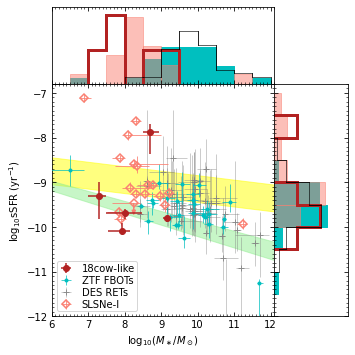

In [8]:
get_plot_fbots()